<a href="https://colab.research.google.com/github/nisha0296/Python-Code/blob/main/Regularized-linear-models/Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [2]:
data=load_diabetes()

In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
X=data.data
Y=data.target

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=45)

In [16]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()
L.fit(X_train,Y_train)

LinearRegression()

In [17]:
print(L.coef_)
print(L.intercept_)

[   41.68728534  -167.45684538   468.63456922   327.54150376
 -1025.43946372   614.14222673   235.60162105   273.36341008
   822.87389419    61.09429004]
152.84649318500624


In [18]:
y_pred=L.predict(X_test)

In [19]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(Y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(Y_test,y_pred)))

R2 score 0.5326715876099554
RMSE 49.926292098799514


In [20]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=100000)
R.fit(X_train,Y_train)

Ridge(alpha=100000)

In [21]:
print(R.coef_)
print(R.intercept_)

[ 0.00264171  0.00113855  0.0067229   0.0057139   0.00258371  0.0021954
 -0.00451879  0.00498467  0.00658953  0.00477671]
150.90942393620304


In [22]:
y_pred1=R.predict(X_test)

In [23]:
print("R2 score",r2_score(Y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(Y_test,y_pred1)))

R2 score -0.0030820489674789897
RMSE 73.1453040573059


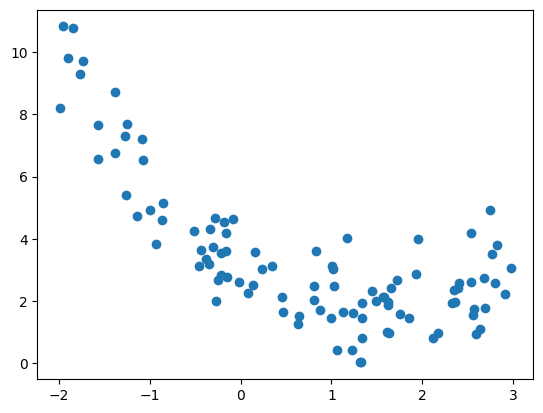

In [24]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

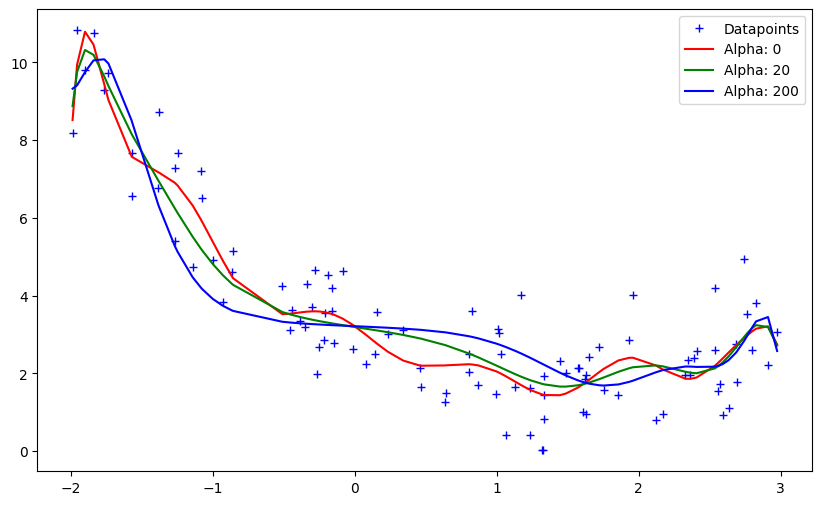

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()
